In [4]:
using PyPlot

# Extreme values

We work with $f:U\subset\mathbb{R}^n\mapsto \mathbb{R}$.

The important concept to learn in the Section are:

* Definition: $(a,b)$ is a critical point of $f$ is $\nabla f(a,b)=0$.

* $f$ attains an extremal value (max or min) at a **critical point**, a **singular point** or a **boundary point**

* The Hessian matrix of a function 

* How to use the Hessian matrix to classify the critical point of $f$.

* The definition of a **saddle point** of $f$

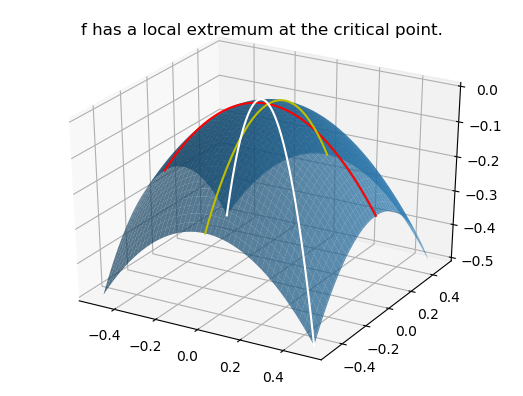

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x13a2c6f28>

In [13]:
xgrid = [ x for x in range(-0.5, stop=0.5, length=601), y in range(-0.5, stop=0.5, length=601) ]
ygrid = [ y for x in range(-0.5, stop=0.5, length=601), y in range(-0.5, stop=0.5, length=601) ]

f(x,y)=-(y^2+x^2)

surf( xgrid, ygrid, f.(xgrid, ygrid), alpha=0.7)
title("f has a local extremum at the critical point.")

t=range(-0.5, stop=0.5, length=101)
plot3D(t, zeros(101), f.(t, 0.0), "r" )

plot3D(zeros(101), t, f.(0.0, t), "y" )

plot3D( -t,t,f.(-t,t),"w")

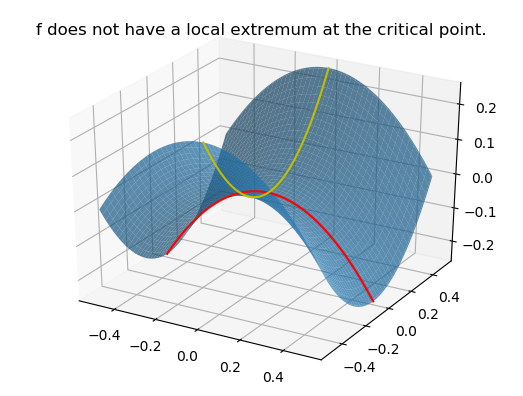

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x13b1c7208>

In [5]:
xgrid = [ x for x in range(-0.5, stop=0.5, length=601), y in range(-0.5, stop=0.5, length=601) ]
ygrid = [ y for x in range(-0.5, stop=0.5, length=601), y in range(-0.5, stop=0.5, length=601) ]

f(x,y)=y^2-x^2

surf( xgrid, ygrid, f.(xgrid, ygrid), alpha=0.7)
title("f does not have a local extremum at the critical point.")

t=range(-0.5, stop=0.5, length=101)
plot3D(t, zeros(101), f.(t, 0.0), "r" )

plot3D(zeros(101), t, f.(0.0, t), "y" )

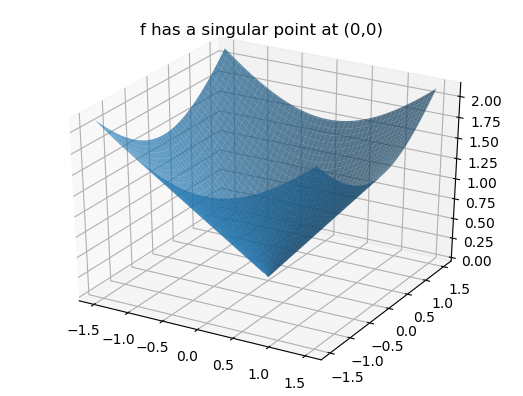

PyObject Text(0.5,0.92,'f has a singular point at (0,0)')

In [16]:
# Example 4 (p754)
xgrid = [ x for x in range(-1.5, stop=1.5, length=601), y in range(-1.5, stop=1.5, length=601) ]
ygrid = [ y for x in range(-1.5, stop=1.5, length=601), y in range(-1.5, stop=1.5, length=601) ]

f(x,y)=sqrt(x^2+y^2)

surf(xgrid, ygrid, f.(xgrid, ygrid), alpha=0.7)
title("f has a singular point at (0,0)")

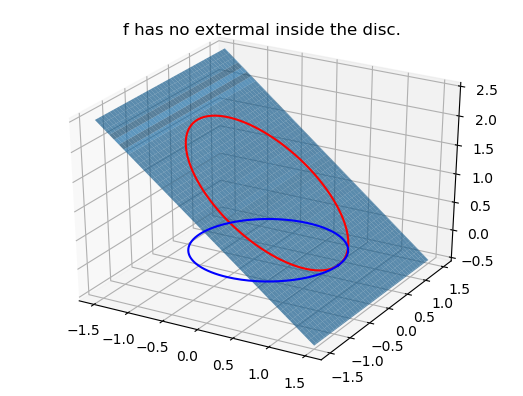

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x13db05898>

In [18]:
# Example 4 (p754)
xgrid = [ x for x in range(-1.5, stop=1.5, length=601), y in range(-1.5, stop=1.5, length=601) ]
ygrid = [ y for x in range(-1.5, stop=1.5, length=601), y in range(-1.5, stop=1.5, length=601) ]

f(x,y)=1-x

surf(xgrid, ygrid, f.(xgrid, ygrid), alpha=0.7)
title("f has no extermal inside the disc.")

t=range(0, stop=2π, length=201)

plot3D( cos.(t), sin.(t), f.(cos.(t), sin.(t)), "r")
plot3D( cos.(t), sin.(t), 0.0*f.(cos.(t), sin.(t)), "b")

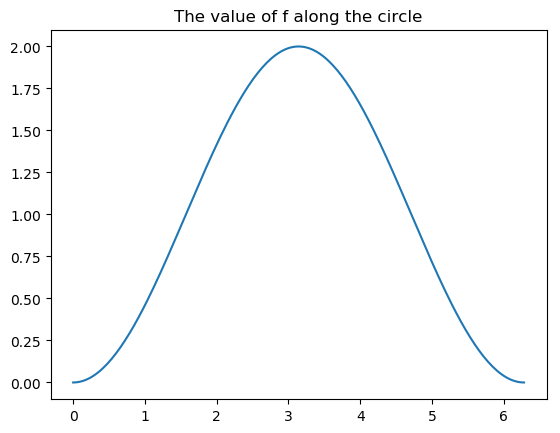

PyObject Text(0.5,1,'The value of f along the circle')

In [20]:
plot(t, f.(cos.(t), sin.(t)))
title("The value of f along the circle")

## Classifying interior critical points by the Hessian matrix of $f$

Recall that we may study the properties of a function near a point $\mathbf{a}$ along different curves passing through that point.

The function 
$$ g(t):= f(\mathbf{a}+t \mathbf{h}) $$
is a single variable function that reveals how the value of $f$ changes along the curve $\mathbf{a}+t \mathbf{h}$.

* $\mathbf{a}$ is an interioir critical point of $f$:

$$\nabla f(\mathbf{a})=\mathbf{0} \implies g^\prime(t=0)=0$$

$$g^{\prime\prime}(t) = (\mathbf{h}\bullet \nabla) f (\mathbf{a}+t \mathbf{h})h_ih_j = \mathbf{h}^\top \mathcal{H}(\mathbf{a}+t \mathbf{h})\mathbf{h} = h_1f_1(\mathbf{a}+t \mathbf{h})+h_2f_2(\mathbf{a}+t \mathbf{h})+ ... $$

* Classify the interior critical points by $g^{\prime\prime}$:

$$g^{\prime\prime}(t) = (\mathbf{h}\bullet \nabla)^2 f = \sum_{i=1}^n\sum_{j=1}^n f_{ij}(\mathbf{a}+t \mathbf{h})h_ih_j = \mathbf{h}^\top \mathcal{H}(\mathbf{a}+t \mathbf{h})\mathbf{h} $$

### The Hessian matrix of $f$

$$\mathcal{H}(\mathbf{x}):=\left(\begin{array}{cccc}
f_{11} & f_{12} & \cdots & f_{1n}\\
f_{21} & f_{22} & \cdots & f_{2n}\\
\vdots & \vdots & \ddots & \vdots\\
f_{n1} & f_{n2} & \cdots & f_{nn}
\end{array}\right)$$

* For every $\mathbf{x}$, $\mathcal{H}(\mathbf{x})$ is a square matrix (symmetric if $f$ has continuous partial derivatives up to at least second order)
* $f$ has a local minimum at $\mathbf{a}$ if $g^{\prime\prime}(0)>0$ for every possible $\mathbf{h}$; i.e. if     $\mathcal{H}$ is **positive definite**

* A matrix is positive (negative)  definite if all it's eigenvalues are positive (negative) 

### Positive definiteness of a matrix

$$ v^\top H v \equiv v\cdot Hv = |v|~|Hv|\cos\theta $$

So no matter what $v$ is (as long as it is no a zero vector), $Hv$ will be a vector whose angle with $v$ is within $[0,\pi/2)$

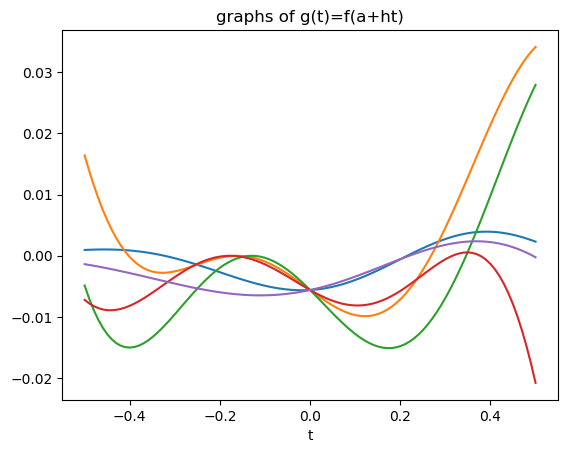

In [13]:
using LinearAlgebra

xgrid = [ x for x in range(-0.5, stop=0.5, length=601), y in range(-0.5, stop=0.5, length=601) ]
ygrid = [ y for x in range(-0.5, stop=0.5, length=601), y in range(-0.5, stop=0.5, length=601) ]

f(x,y,z)= z^2*sin(2π*x)*cos(π*y) #-(y^2+x^2)

#pygui(true)
#clf()
#surf( xgrid, ygrid, f.(xgrid, ygrid), alpha=0.7)

t=range(-0.5, stop=0.5, length=101)

#select a point
a,b, c=-0.2, 0.3, 0.1

#pygui(true)
for i=1:5
#give any h
h=rand(3)
h./=norm(h) #make h a unit vector

#create a line 

gamma1= a .+ t*h[1]
gamma2= b .+ t*h[2]
gamma3= c .+ t*h[3]

#evaluate restriction of f on this line

#plot3D( gamma1, gamma2, f.(gamma1, gamma2, gamma3), "r")

#figure()

plot(t,f.(gamma1, gamma2, gamma3) )
xlabel("t")
title("graphs of g(t)=f(a+ht)")

end


In [7]:
pygui(false)

false

In [17]:
# Example 6 (p.757)
using LinearAlgebra

H=[2.0 2.0 0.0; 2.0 -1.0 2.0; 0.0 2.0 2.0]

U, V= eigen(H)

display(U)

3-element Array{Float64,1}:
 -2.701562118716421 
  2.0000000000000018
  3.7015621187164243

In [ ]:
Work out Example 2 (p.761)

In [2]:
using PyPlot

# Lagrange multiplier 


## Optimization with a single constraint equation 

A techinuqe to find the maximum of $f$ under constraint $g(x,y)=C$

$$\mathbf{maximize}~f(x,y)~~~~~\mathbf{subject~to}~~~~~ g(x,y)=C$$

In other words:

* Find the maximum value of $f$ along the $C$ level set of $g$

* On the level set of $g$, $f$ attains extrema when 

$$ \nabla f(x,y) \parallel \nabla g(x,y) \iff \nabla f(x,y)=\lambda \nabla g(x,y)~~~\textrm{for some }\lambda$$ 

* This $\lambda$ is call a **Lagrange multiplier**

Read Theorem 4 (p. 767)

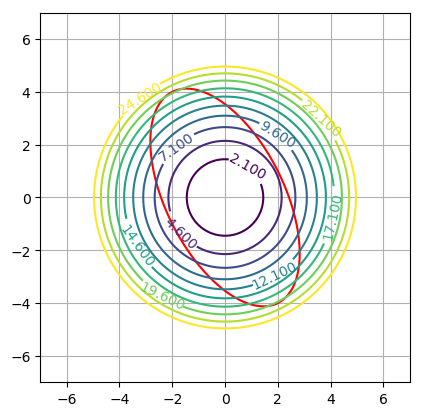

(-7.0, 7.0, -7.0, 7.0)

In [32]:
X= repeat( range(-7, stop=7, length=201), 1, 201)
Y= repeat( range(-7, stop=7, length=201), 1, 201)'

g=(x,y)-> 17x^2+12x*y+8y^2

f=(x,y)-> x^2+y^2

contour( X, Y, g.(X,Y), [100], colors="red")
cp=contour(X,Y, f.(X,Y), 2.1:2.5:25, linewidth=0.5); clabel(cp,inline=1, fontsize=10)
grid("on")
axis("image")

#### So why does $f$ attain extremum when $\nabla f(x,y) \parallel \nabla g(x,y)$?

* Directional derivative of $f$: $$D_\mathbf{u(x,y)} f(x,y) = \mathbf{u(x,y)}\cdot \nabla f(x,y)$$

* The available directions are only the tagent directions of the level set of $g$; i.e. $\nabla g^\perp$

* Critical point of the restriction of $f$ on the zero level set of $g$ at: $\mathbf{u}(x,y) \perp \nabla f(x,y)$

* Therefore, at a critical point of the restriction of $f$,  $$\nabla f(x,y) \parallel \nabla g(x,y) $$

### The method of Lagrange multiplier

A systematic way is to find the critical points of the **Lagrange function**
$$ L(x,y,\lambda) := f(x,y)+\lambda g(x,y) $$

I.e. Solve for $x,y$ and $\lambda$ if needed.

Example 2 (p768)

Example 3 (p 769) for an example where the method of Lagrange multiplier does not apply.

* Read the Remark on page 770.


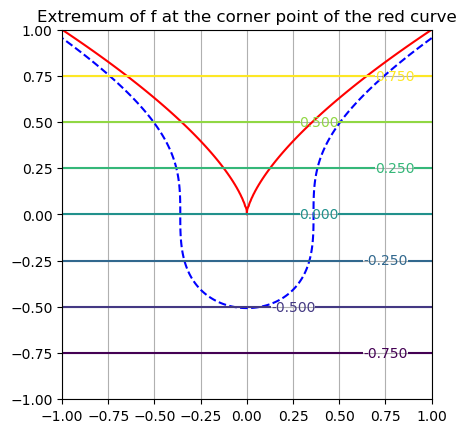

PyObject Text(0.5,1,'Extremum of f at the corner point of the red curve')

In [25]:
X= repeat( range(-1, stop=1, length=201), 1, 201)
Y= repeat( range(-1, stop=1, length=201), 1, 201)'

ff=(x,y)->y
gg=(x,y)->y^3-x^2

contour( X, Y, gg.(X,Y), [0], colors="red")
contour( X, Y, gg.(X,Y), [-0.13], colors="blue")

cp=contour(X,Y, ff.(X,Y), linewidth=0.5); clabel(cp,inline=1, fontsize=10)
grid("on")
axis("image")

title("Extremum of f at the corner point of the red curve")

## Optimization with an inequality constraint

$$\mathbf{maximize}~f(x,y)~~~~~\mathbf{subject~to}~~~~~ g(x,y)\le 0$$

* The inequality $g(x,y)\le 0$ defines a region, $U$, in which we should find the maximum of $f$.

* Again, we should check for:
    * critical points of $f$ inside $U$
    * singular points
    * boundary points, which corresponds to 
    $$\mathbf{maximize}~f(x,y)~~~~~\mathbf{subject~to}~~~~~ g(x,y)= 0$$

See Example 4 (p.770)

## Optimization with multiple constraints

$$\mathbf{maximize}~f(x,y,z)~~~~~\mathbf{subject~to}~~~~~ g(x,y,z)= 0~\mathbf{and }~~h(x,y,z)=0$$

In order words, we wish to find the maximum of $f$ along the intersection of the zero level sets of $g$ and $h$.

Consider a curve on the intersection of $g=0$ and $h=0$, and the value of $f$ along this curve.

Find critical points of $L(x,y,z,\lambda,\mu):= f(x,y,z)+\lambda g(x,y,z)+\mu h(x,y,z)$